#

In [8]:
import numpy as np
from numpy.random import Generator, PCG64
import matplotlib.pyplot as plt
import math
import time
from heateq import Exact, Simulateur

In [9]:
seed = 213731490053398181466621250222036675538
rng = Generator(PCG64(seed))

In [10]:
# Permet d'obtenir un n-échnatillon du vecteur aléatoir d'entrée X
def n_echantillon_X(n):
    return np.vstack(
        (
            rng.uniform(-math.pi, math.pi, (3, n)),
            rng.uniform(0.001, 0.009, (1, n)), 
            rng.uniform(-1., 1., (3, n))
        )
    )

In [11]:
# Simulateurs haute et basse fidélité
f = Simulateur(21, 100)
g = Simulateur(3, 20)

In [12]:
# Espérance exacte de la solution continue
mu_exact = Exact().mu
print(mu_exact)

# Espérance exacte de Y = f(X) (solution discrétisée, haute fidélité)
mu_Y_exact = f.mu
print(mu_Y_exact)

# Espérance exacte de Z = g(X) (solution discrétisée, basse fidélité)
mu_Z_exact = g.mu

print(mu_Z_exact)

41.98447216482205
41.916465294707976
33.03617206344313


In [13]:
f = Simulateur(21, 100)
mu_Y_exact = f.mu
print(mu_Y_exact)

41.916465294707976


# Expériences numériques

Déduire de `mu_exact`, `mu_Y_exact` et `mu_Z_exact` le biais de l'estimateur Monte Carlo classique de l'espérance de $f(\mathbf{X})$ et $g(\mathbf{X})$.

Lancer les simulateurs sur un nombre élevé de réalisations (par exemple 50000 ou 100000 si la mémoire de votre ordinateur le permet).

La quantité d'intérêt peut être évaluée par la fonction `f` du simulateur haute fidélité et par la fonction `g` du simulateur basse fidélité.

Estimer $w$. Vous pouvez utiliser, par exemple, la fonction `time.process_time()`. Est-ce consistant avec la valeur attendue ?

In [14]:
ns = 100000
X = n_echantillon_X(ns)

In [15]:
X.shape

(7, 100000)

In [16]:
# Start the stopwatch / counter  
t1_start = time.process_time()  
   
f.eval(X)

# Stop the stopwatch / counter 
t1_stop = time.process_time() 
   
print("Elapsed time of f in seconds:", t1_stop-t1_start)  


Elapsed time of f in seconds: 2.877021878


In [13]:
t2_start = time.process_time()  
   
g.eval(X)

# Stop the stopwatch / counter 
t2_stop = time.process_time() 
   
print("Elapsed time of g in seconds:", t2_stop-t2_start)  

Elapsed time of g in seconds: 0.06399212999999992


In [14]:
1/(t1_stop - t1_start)*(t2_stop - t2_start)

0.022372693484680222

Pour $n \in \{10; 20; 50; 100; 200; 500; 1000; 2000; 5000; 10000\}$, estimer `nr = 500` fois la moyenne (par Monte Carlo classique) de $Y=f(\mathbf{X})$, $Z=g(\mathbf{X})$ et estimer l'espéance, l'écart-type et la racine de l'erreur quadratique moyenne (REQM) des estimateurs.

Tracer l'espérance et l'écart-type des estimateurs haute et basse fidélité en fonction de $n$. Sur un autre graphe, tracer l'évolution de la REQM des estimateurs en fonction de $n$.

In [15]:
np.sqrt([35])

array([5.91607978])

In [16]:
nr = 200
n_samples = [5, 10, 20, 50, 100, 200, 1000, 2000, 5000, 10000]
eqm_list_f = []
eqm_list_g = []

for n in n_samples:
    eqm_f = 0
    eqm_g = 0
    for i in range(nr):
        X = n_echantillon_X(n)
        f_X = f.eval(X)
        theta_f = np.mean(f_X)
        eqm_f += (theta_f- mu_exact)**2

        g_X = g.eval(X)
        theta_g = np.mean(g_X)
        eqm_g += (theta_g - mu_exact)**2

    eqm_list_f.append(eqm_f/nr)
    eqm_list_g.append(eqm_g/nr) 

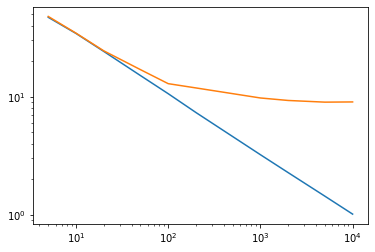

In [17]:
plt.loglog(n_samples, np.sqrt(eqm_list_f))
plt.loglog(n_samples, np.sqrt(eqm_list_g))

In [18]:
nr = 200

factor_compute_cost = 35 # math.sqrt(35) # l'inverse de w
n_samples = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
eqm_list_f = []
eqm_list_g = []


for n in n_samples:
    eqm_f = 0
    eqm_g = 0
    for i in range(nr):
        X = n_echantillon_X(n)
        f_X = f.eval(X)
        theta_f = np.mean(f_X)
        eqm_f += (theta_f- mu_exact)**2

        X = n_echantillon_X(n*factor_compute_cost)
        g_X = g.eval(X)
        theta_g = np.mean(g_X)
        eqm_g += (theta_g - mu_exact)**2

    eqm_list_f.append(eqm_f/nr)
    eqm_list_g.append(eqm_g/nr)


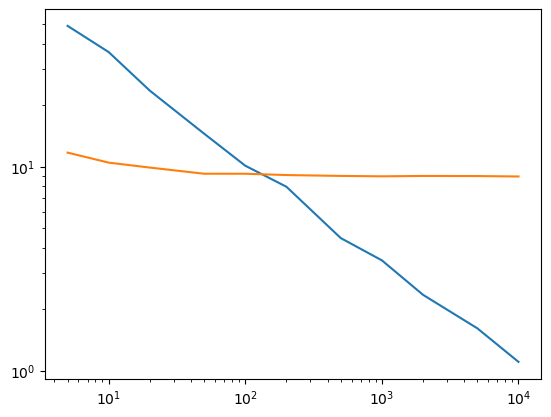

In [37]:
plt.loglog(n_samples, np.sqrt(eqm_list_f))
plt.loglog(n_samples, np.sqrt(eqm_list_g))